In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("inputs/13", "r") as f:
    lines = f.read().splitlines()

p = re.compile("fold along (x|y)=(\d+)")
points = []
folds = []
for line in lines:
    if line == "":
        continue
    
    if p.match(line):
        axis, pos = p.match(line).groups()
        pos = int(pos)
        folds.append((axis, pos))
    else:
        points.append(tuple(map(int, line.split(","))))
        


In [3]:
max_y = max(points, key=lambda x: x[0])[0] + 1
max_x = max(points, key=lambda x: x[1])[1] + 1

g = np.zeros((max_x, max_y))
for point in points:
    g[point[::-1]] = 1

for i, (axis, pos) in enumerate(folds):
    if axis == "y":
        lower = g[pos + 1:]
        upper = g[:pos]
        lower = np.flip(lower, axis=0)
        g = np.logical_or(lower, upper)
    if axis == "x":
        right = g[:, pos +1:]
        left = g[:, :pos]
        right = np.flip(right, axis=1)
        g = np.logical_or(right, left)
        
    if i == 0:
        print(np.sum(g))
        
    

689


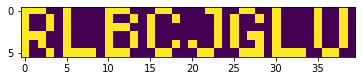

In [4]:
plt.imshow(g)